# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

df = pd.read_csv('df_encoded.csv')

In [45]:
df.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau',
       'educacao_Higher education', 'educacao_Incomplete higher',
       'educacao_Lower secondary', 'educacao_Secondary / secondary special',
       'tipo_renda_Pensioner', 'tipo_renda_State servant',
       'tipo_renda_Student', 'tipo_renda_Working', 'estado_civil_Married',
       'estado_civil_Separated', 'estado_civil_Single / not married',
       'estado_civil_Widow', 'tipo_residencia_House / apartment',
       'tipo_residencia_Municipal apartment',
       'tipo_residencia_Office apartment', 'tipo_residencia_Rented apartment',
       'tipo_residencia_With parents'],
      dtype='object')

In [46]:
y = df.mau

In [47]:
y

,mau
0,0
1,0
2,0
3,0
4,0
...,...
6765,1
6766,1
6767,1
6768,1


In [48]:
X = df.drop('mau', axis=1)

In [49]:
X

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,tipo_renda_Working,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,0,58.832877,3.106849,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,0,1,0,52.356164,8.358904,1,0,1,1,...,0,0,0,1,0,1,0,0,0,0
2,0,1,1,0,46.224658,2.106849,1,1,1,1,...,1,1,0,0,0,1,0,0,0,0
3,1,1,0,0,29.230137,3.021918,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
4,1,0,1,0,27.482192,4.024658,1,0,1,0,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,1,0,1,1,34.857534,3.101370,1,1,1,0,...,1,0,0,1,0,1,0,0,0,0
6766,1,0,1,0,54.109589,9.884932,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
6767,1,0,1,0,43.389041,7.380822,1,1,1,0,...,0,1,0,0,0,1,0,0,0,0
6768,0,1,1,0,30.005479,9.800000,1,1,0,0,...,1,1,0,0,0,1,0,0,0,0


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [51]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)

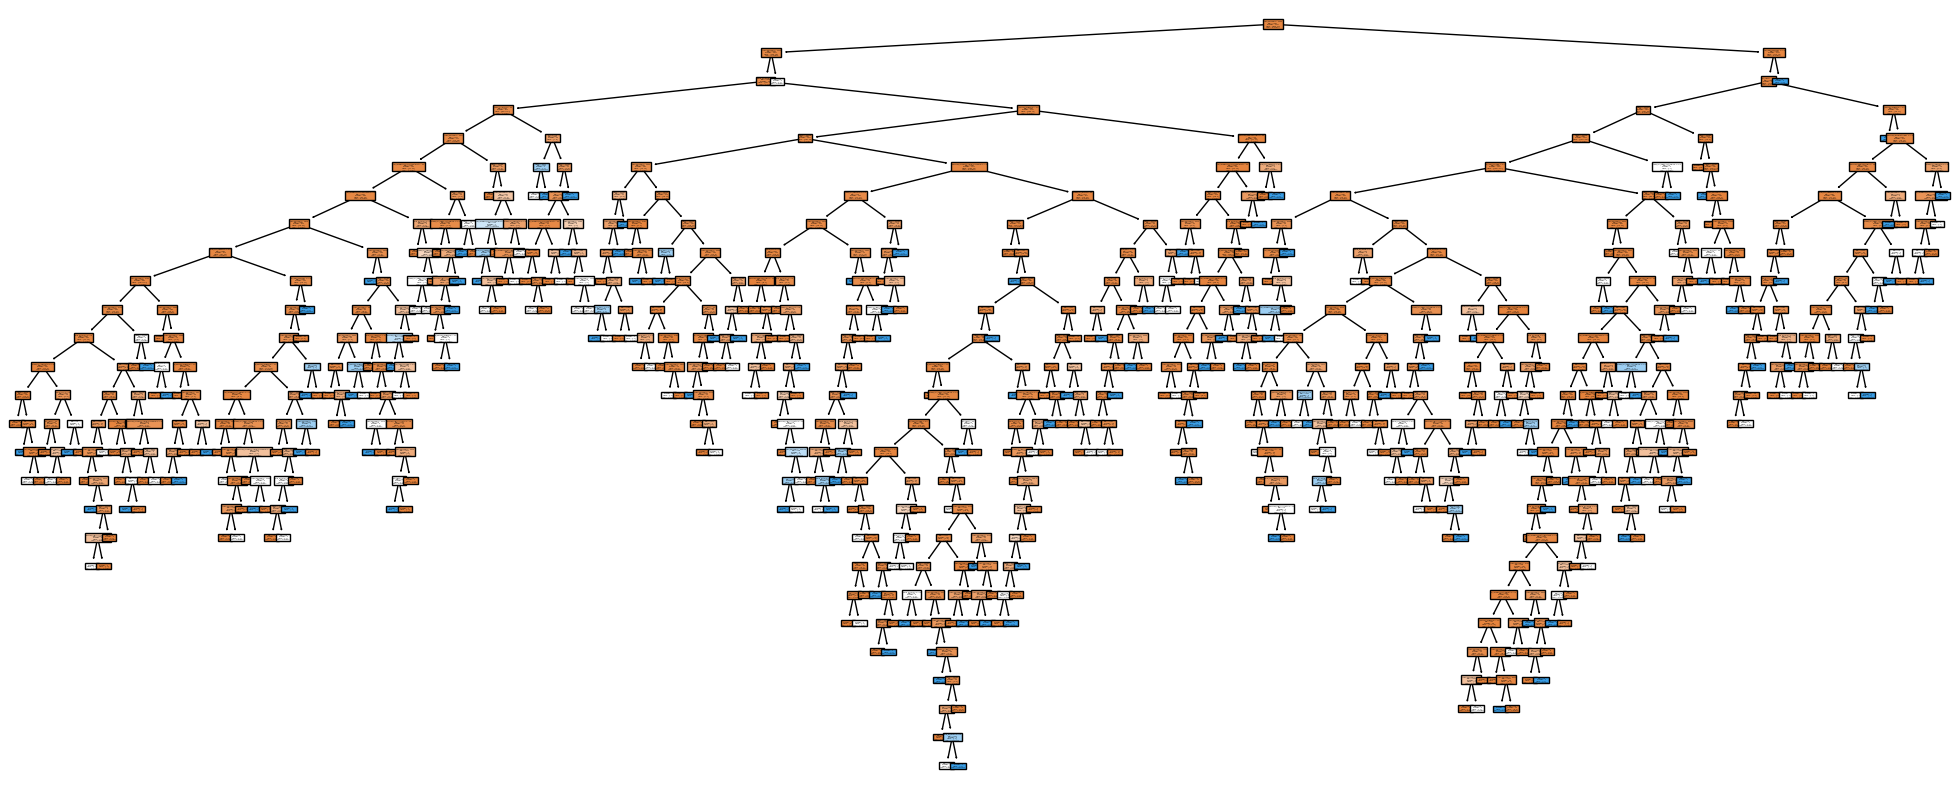

In [52]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=list(X_train.columns));

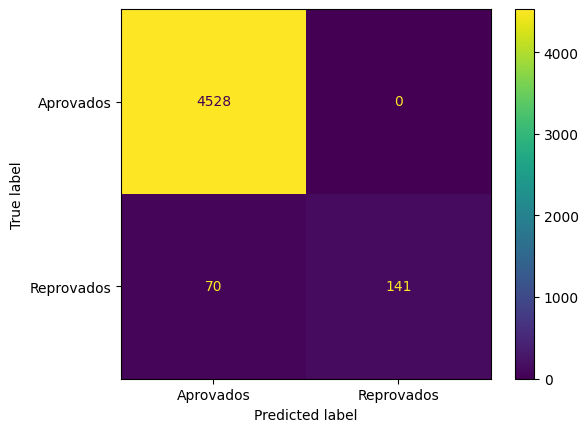

In [53]:
cm = confusion_matrix(y_train, clf.predict(X_train), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

MatrizDeConfusao.plot()

In [54]:
accuracy_score(y_train, clf.predict(X_train))

0.9852289512555391

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [55]:
y_chapeu_teste = clf.predict(X_test)
y_chapeu_teste

array([0, 0, 0, ..., 0, 0, 0])

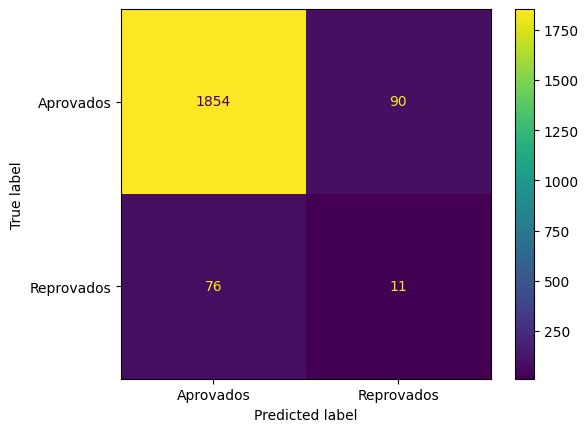

In [56]:
cm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

MatrizDeConfusao.plot();

In [57]:
accuracy_score(y_test, y_chapeu_teste)

0.9182668636139832

In [61]:
clf2 = DecisionTreeClassifier(random_state=123, max_depth=10, min_samples_leaf=5)
clf2 = clf2.fit(X_train,y_train)
predict = clf2.predict(X_test)
accuracy_score(y_test, predict)

0.9537173806006893

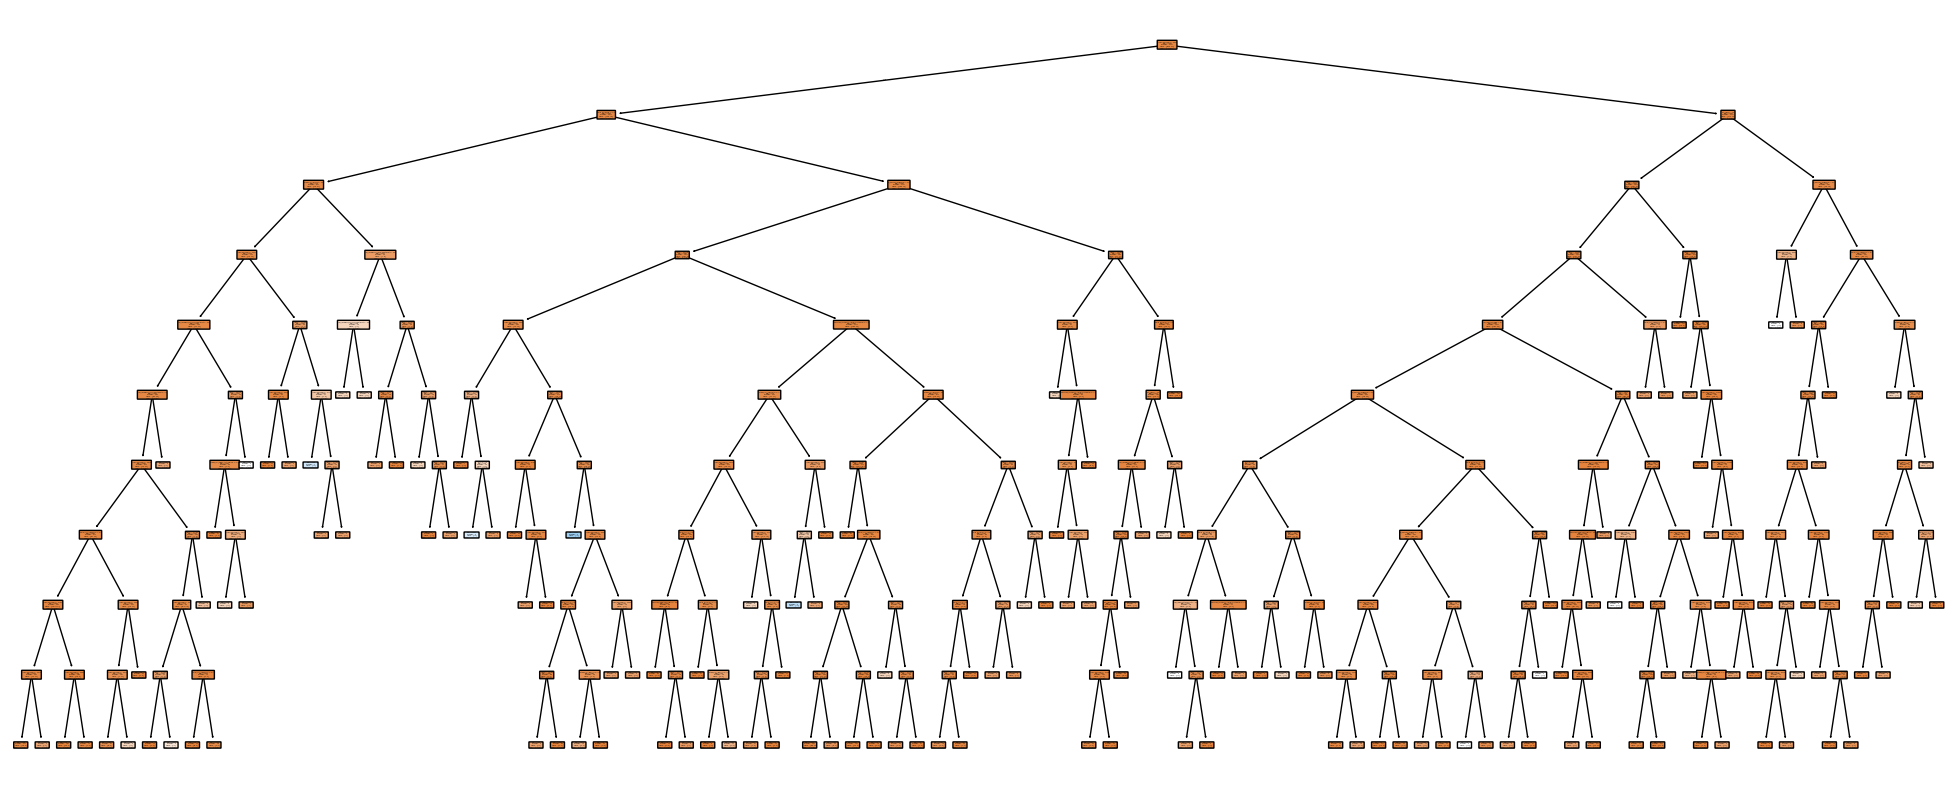

In [65]:
plt.figure(figsize=(25, 10))
plot_tree(clf2,
          filled=True,
          rounded=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=list(X_train.columns));

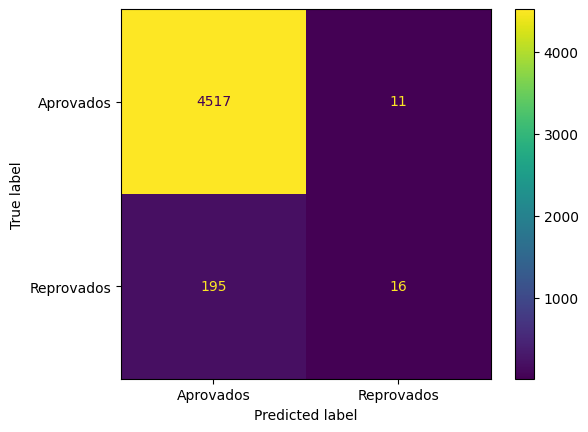

In [66]:
cm = confusion_matrix(y_train, clf2.predict(X_train), labels=clf2.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

MatrizDeConfusao.plot()

Proporção de proponentes classificados como maus(reprovados):

In [67]:
16/(11+195+1427+16)

0.009702850212249849